In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## Load data:

In [26]:
data = pd.read_csv("ElectionsData.csv", header=0)

## Identify and set the correct type:

In [27]:
data.dtypes

Vote                                              object
Occupation_Satisfaction                          float64
Avg_monthly_expense_when_under_age_21            float64
AVG_lottary_expanses                             float64
Most_Important_Issue                              object
Avg_Satisfaction_with_previous_vote              float64
Looking_at_poles_results                          object
Garden_sqr_meter_per_person_in_residancy_area    float64
Married                                           object
Gender                                            object
Voting_Time                                       object
Financial_balance_score_(0-1)                    float64
%Of_Household_Income                             float64
Avg_government_satisfaction                      float64
Avg_education_importance                         float64
Avg_environmental_importance                     float64
Avg_Residancy_Altitude                           float64
Yearly_ExpensesK               

In [28]:
non_float_data = data.select_dtypes(exclude=['floating'])
non_float_data.describe()
for column in non_float_data:
    print(str(column)+": "+str(data[column].unique()))

Vote: ['Purples' 'Greens' 'Browns' 'Pinks' 'Blues' 'Oranges' 'Yellows' 'Whites'
 'Reds' 'Greys']
Most_Important_Issue: ['Healthcare' 'Environment' 'Social' 'Military' 'Financial' 'Education'
 'Other' 'Foreign_Affairs' nan]
Looking_at_poles_results: ['No' 'Yes' nan]
Married: ['Yes' 'No' nan]
Gender: ['Male' 'Female' nan]
Voting_Time: ['After_16:00' 'By_16:00' nan]
Will_vote_only_large_party: ['No' 'Yes' 'Maybe' nan]
Age_group: ['45_and_up' '30-45' 'Below_30' nan]
Main_transportation: ['Public_or_other' 'Motorcycle_or_truck' 'Foot_or_bicycle' 'Car' nan]
Occupation: ['Hightech' 'Public_Sector' 'Services_or_Retail' 'Student_or_Unemployed'
 'Industry_or_other' nan]
Financial_agenda_matters: ['No' 'Yes' nan]


In [31]:
data['Looking_at_poles_results_int'] = data['Looking_at_poles_results'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
pd.crosstab(data.Looking_at_poles_results_int, data.Looking_at_poles_results, rownames=['Looking_at_poles_results_int'], colnames=['Looking_at_poles_results'])

Looking_at_poles_results,No,Yes
Looking_at_poles_results_int,,
0,8480,0
1,0,1429


In [32]:
data['Married_int'] = data['Married'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
pd.crosstab(data.Married_int, data.Married, rownames=['Married_int'], colnames=['Married'])

Married,No,Yes
Married_int,,
0,1892,0
1,0,8037


In [33]:
data['Gender_int'] = data['Gender'].map( {'Male':0, 'Female':1, np.nan:-1}).astype(int)
pd.crosstab(data.Gender_int, data.Gender, rownames=['Gender_int'], colnames=['Gender'])

Gender,Female,Male
Gender_int,,
0,0,4912
1,5016,0


In [34]:
data['Voting_Time_int'] = data['Voting_Time'].map( {'By_16:00':0, 'After_16:00':1, np.nan:-1}).astype(int)
pd.crosstab(data.Voting_Time_int, data.Voting_Time, rownames=['Voting_Time_int'], colnames=['Voting_Time'])

Voting_Time,After_16:00,By_16:00
Voting_Time_int,,
0,0,4859
1,5044,0


In [35]:
data['Financial_agenda_matters_int'] = data['Financial_agenda_matters'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
pd.crosstab(data.Financial_agenda_matters_int, data.Financial_agenda_matters, rownames=['Financial_agenda_matters_int'], colnames=['Financial_agenda_matters'])

Financial_agenda_matters,No,Yes
Financial_agenda_matters_int,,
0,4892,0
1,0,5015


In [36]:
data['Most_Important_Issue_cat'] = data['Most_Important_Issue'].astype("category")
data['Most_Important_Issue_int'] = data['Most_Important_Issue_cat'].cat.rename_categories(range(data['Most_Important_Issue_cat'].nunique())).astype(int)

data['Age_group_cat'] = data['Age_group'].astype("category")
data['Age_group_int'] = data['Age_group_cat'].cat.rename_categories(range(data['Age_group_cat'].nunique())).astype(int)

data['Will_vote_only_large_party_cat'] = data['Will_vote_only_large_party'].astype("category")
data['Will_vote_only_large_party_int'] = data['Will_vote_only_large_party_cat'].cat.rename_categories(range(data['Will_vote_only_large_party_cat'].nunique())).astype(int)

data['Main_transportation_cat'] = data['Main_transportation'].astype("category")
data['Main_transportation_int'] = data['Main_transportation_cat'].cat.rename_categories(range(data['Main_transportation_cat'].nunique())).astype(int)

data['Occupation_cat'] = data['Occupation'].astype("category")
data['Occupation_int'] = data['Occupation_cat'].cat.rename_categories(range(data['Occupation_cat'].nunique())).astype(int)



In [37]:
data = data.drop(['Looking_at_poles_results','Married','Gender','Voting_Time','Financial_agenda_matters','Most_Important_Issue','Most_Important_Issue_cat','Age_group','Age_group_cat','Will_vote_only_large_party','Will_vote_only_large_party_cat','Main_transportation','Will_vote_only_large_party_cat','Main_transportation','Main_transportation_cat','Occupation','Occupation_cat'], axis=1) 

In [17]:
data.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Looking_at_poles_results_int,Married_int,Gender_int,Voting_Time_int,Financial_agenda_matters_int,Most_Important_Issue_int,Age_group_int,Will_vote_only_large_party_int,Main_transportation_int,Occupation_int
count,9809.000000,9809.000000,9818.000000,9829.000000,9794.000000,9810.000000,9813.000000,9806.000000,9823.000000,9783.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.511367,507.643792,67380.919408,169.002686,402.579462,0.500668,0.500361,4.987585,5.007205,5.003874,...,0.133800,0.796600,0.494400,0.494700,0.492200,-8.393269e+16,-7.747633e+16,-5.718491e+16,-7.839866e+16,-9.223372e+16
std,2.855781,433.518917,69473.844694,144.476593,133.557107,0.288094,0.286215,2.895290,2.885800,2.893176,...,0.366212,0.419817,0.514194,0.519036,0.518234,8.758849e+17,8.418202e+17,7.240304e+17,8.467735e+17,9.177598e+17
min,1.000000,-855.714730,-166375.186748,-285.238243,1.511957,0.000078,0.000413,0.000001,0.000048,0.000591,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-9.223372e+18,-9.223372e+18,-9.223372e+18,-9.223372e+18,-9.223372e+18
25%,3.000000,199.225499,24420.519122,66.121900,307.042438,0.248523,0.255014,2.467898,2.524549,2.497779,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,6.000000,387.469720,48410.029203,128.670084,389.081350,0.500569,0.503486,4.996661,5.039814,4.958118,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
75%,8.000000,708.293034,86099.873686,235.848891,479.527037,0.746059,0.743708,7.492286,7.467005,7.502315,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
max,10.000000,2305.237140,560309.089996,768.412380,855.997552,0.999887,0.999597,9.999719,9.997036,9.999264,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00


## Data preperation:

### Data exploration:

In [52]:
data['Occupation_int'].unique()

array([                   0,                    2,                    3,
                          4,                    1, -9223372036854775808])

count    9783.000000
mean        5.003874
std         2.893176
min         0.000591
25%         2.497779
50%         4.958118
75%         7.502315
max         9.999264
Name: Avg_environmental_importance, dtype: float64

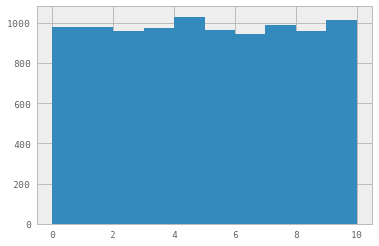

In [47]:
data['Avg_environmental_importance'].hist()
data['Avg_environmental_importance'].describe()

count    9790.000000
mean     6497.836874
std      2003.184707
min      3000.000000
25%      4791.250000
50%      6491.000000
75%      8225.000000
max      9999.000000
Name: Yearly_ExpensesK, dtype: float64

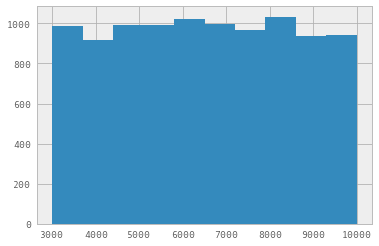

In [46]:
data['Yearly_ExpensesK'].hist()
data['Yearly_ExpensesK'].describe()

count    9794.000000
mean      402.579462
std       133.557107
min         1.511957
25%       307.042438
50%       389.081350
75%       479.527037
max       855.997552
Name: Garden_sqr_meter_per_person_in_residancy_area, dtype: float64

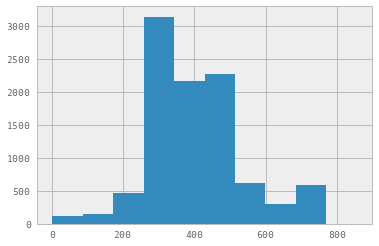

In [53]:
data['Garden_sqr_meter_per_person_in_residancy_area'].hist()
data['Garden_sqr_meter_per_person_in_residancy_area'].describe()

count    9795.000000
mean        0.662685
std         1.039230
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Num_of_kids_born_last_10_years, dtype: float64

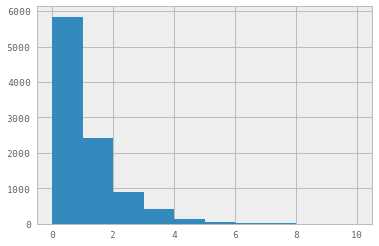

In [55]:
data['Num_of_kids_born_last_10_years'].hist()
data['Num_of_kids_born_last_10_years'].describe()

count    9795.000000
mean       50.485939
std        29.089206
min         0.005870
25%        24.948666
50%        50.628891
75%        75.849041
max        99.996897
Name: %Time_invested_in_work, dtype: float64

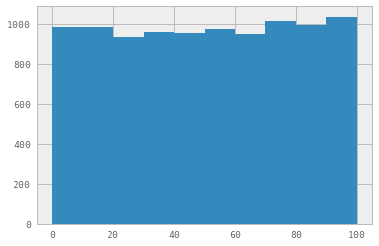

In [56]:
data['%Time_invested_in_work'].hist()
data['%Time_invested_in_work'].describe()

count    9797.000000
mean      209.321953
std       108.067552
min         7.141800
25%       130.719573
50%       210.695887
75%       262.212294
max       822.382848
Name: Weighted_education_rank, dtype: float64

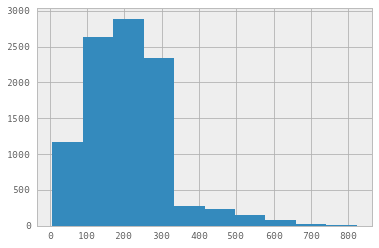

In [57]:
data['Weighted_education_rank'].hist()
data['Weighted_education_rank'].describe()

In [ ]:
data['Avg_monthly_expense_on_pets_or_plants'].hist()
data['Avg_monthly_expense_on_pets_or_plants'].describe()

In [ ]:
data['%_satisfaction_financial_policy'].hist()
data['%_satisfaction_financial_policy'].describe()

In [ ]:
data['Political_interest_Total_Score'].hist()
data['Political_interest_Total_Score'].describe()

In [ ]:
data['Avg_size_per_room'].hist()
data['Avg_size_per_room'].describe()

In [ ]:
data['Avg_government_satisfaction'].hist()
data['Avg_government_satisfaction'].describe()

In [ ]:
data['Occupation_Satisfaction'].hist()
data['Occupation_Satisfaction'].describe()

In [ ]:
data['Avg_monthly_expense_when_under_age_21'].hist()
data['Avg_monthly_expense_when_under_age_21'].describe()

In [ ]:
data['Financial_balance_score_(0-1)'].hist()
data['Financial_balance_score_(0-1)'].describe()

In [ ]:
data['Avg_monthly_household_cost'].hist()
data['Avg_monthly_household_cost'].describe()

In [ ]:
data['Yearly_IncomeK'].hist()
data['Yearly_IncomeK'].describe()

In [ ]:
data['%Of_Household_Income'].hist()
data['%Of_Household_Income'].describe()

In [ ]:
data['Number_of_valued_Kneset_members'].hist()
data['Number_of_valued_Kneset_members'].describe()

In [ ]:
data['AVG_lottary_expanses'].hist()
data['AVG_lottary_expanses'].describe()

In [ ]:
data['Overall_happiness_score'].hist()
data['Overall_happiness_score'].describe()

In [ ]:
data['Phone_minutes_10_years'].hist()
data['Phone_minutes_10_years'].describe()

In [ ]:
data['Avg_Residancy_Altitude'].hist()
data['Avg_Residancy_Altitude'].describe()

In [ ]:
data['Avg_monthly_income_all_years'].hist()
data['Avg_monthly_income_all_years'].describe()

In [ ]:
data['Avg_Satisfaction_with_previous_vote'].hist()
data['Avg_Satisfaction_with_previous_vote'].describe()

In [ ]:
data['Last_school_grades'].hist()
data['Last_school_grades'].describe()

In [ ]:
data['Number_of_differnt_parties_voted_for'].hist()
data['Number_of_differnt_parties_voted_for'].describe()

In [ ]:
data['Occupation_int'].hist()
data['Occupation_int'].unique()

In [ ]:
data['Main_transportation_int'].hist()
data['Main_transportation_int'].unique()

In [ ]:
data['Looking_at_poles_results_int'].hist()
data['Looking_at_poles_results_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

In [ ]:
data['Married_int'].hist()
data['Married_int'].unique()

### Imputation:

In [18]:
data.isnull().sum().sort_values(ascending=False)

Avg_environmental_importance                     217
Yearly_ExpensesK                                 210
Garden_sqr_meter_per_person_in_residancy_area    206
Num_of_kids_born_last_10_years                   205
%Time_invested_in_work                           205
Weighted_education_rank                          203
Avg_monthly_expense_on_pets_or_plants            198
%_satisfaction_financial_policy                  198
Political_interest_Total_Score                   195
Avg_size_per_room                                194
Avg_government_satisfaction                      194
Occupation_Satisfaction                          191
Avg_monthly_expense_when_under_age_21            191
Financial_balance_score_(0-1)                    190
Avg_monthly_household_cost                       188
Yearly_IncomeK                                   188
%Of_Household_Income                             187
Number_of_valued_Kneset_members                  184
AVG_lottary_expanses                          

Data Cleansing:

Normalization:

Feature Selection:

## Split data to train, test and validation:

In [52]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

## Save to csv:

In [54]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
validate.to_csv("validate.csv", index=False)